In [19]:
import matplotlib.pyplot as plt
import math
import numpy as np
import numpy.linalg as lg
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq
import statsmodels.api as sm
from sklearn.decomposition import PCA

In [20]:
def sigenerator(len_m, n_lvl, k):

    x = linspace(0, len_m, len_m)
    mu, sigma = 0, 1
    a0 = 0.61
    a1 = 0.81
    a2 = 0.41
    w0 = 0.38100201
    w1 = 0.17808989
    w2 = 0.03
    sig = np.exp(-k*x)*((a0 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00) +
                        (a1 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00) +
                        (a2 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.00)) + [x for x in n_lvl*(np.random.normal(mu, sigma, len_m))]
    return x, sig


In [21]:
def spectr_sig(x, sig):
    spectr = rfft(sig - np.mean(sig)) / (len(sig))
    nu = rfftfreq(len(sig), 1.)

    return np.abs(spectr), nu

In [24]:
def plotter_sig(x, sig, name_sig, name_fft):

    spectr, nu = spectr_sig(x, sig)

    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(x, sig)
    plt.title("Исходный сигнал", fontsize=15)
    plt.xlabel("N", fontsize=13)
    plt.grid(True)
    plt.savefig(name_sig)
    plt.show()     
    
    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(nu, spectr)
    plt.title("Спектр", fontsize=15)
    plt.xlabel("", fontsize=13)
    plt.grid(True)
    plt.savefig(name_fft)
    plt.show()     

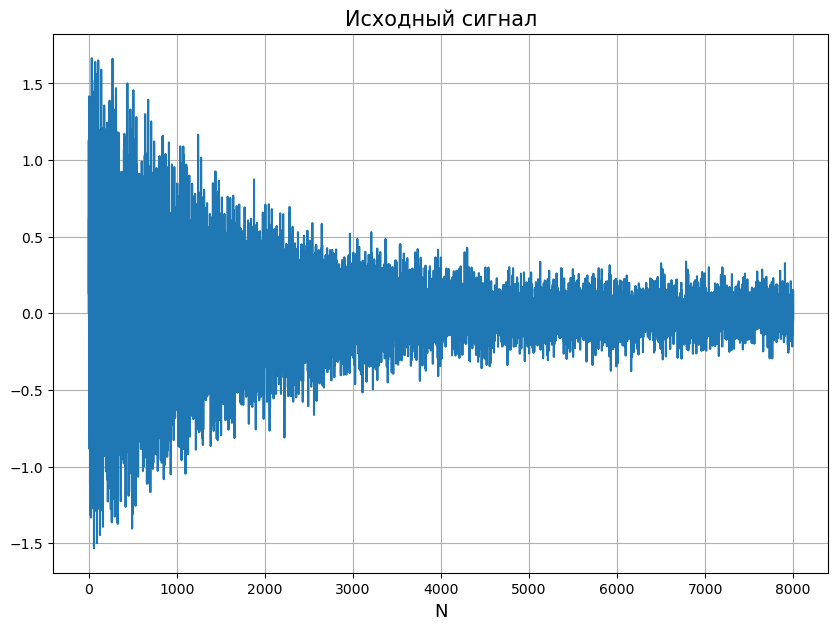

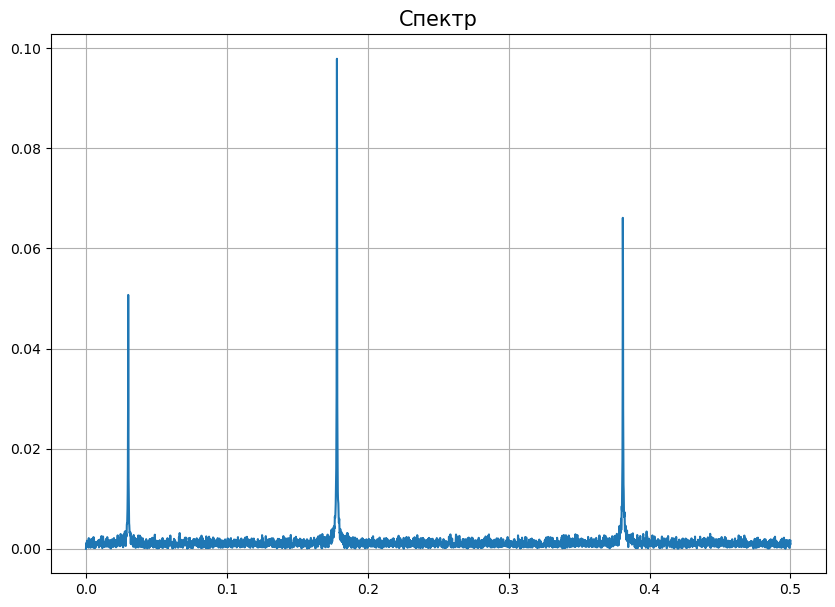

In [25]:
x, sig = sigenerator(8000, 0.1, 0.0005)
plotter_sig(x, sig, 'Signal.png', 'Sig_FFT.png')


In [26]:
def bk_filter(sig, K):
    sig_bk = sm.tsa.filters.bkfilter(sig, 5, 6.67, K)
    x_bk = linspace(0, len(sig_bk), len(sig_bk))
    return x_bk, sig_bk

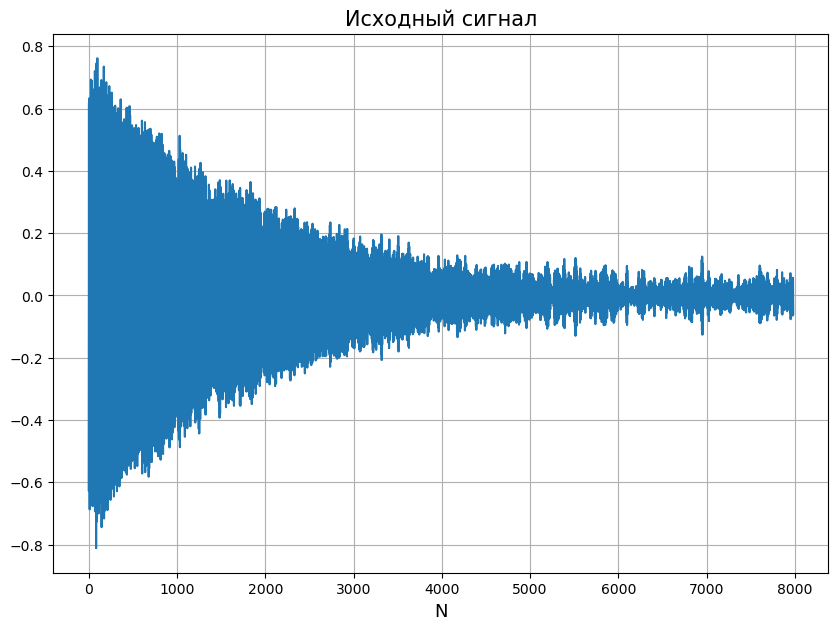

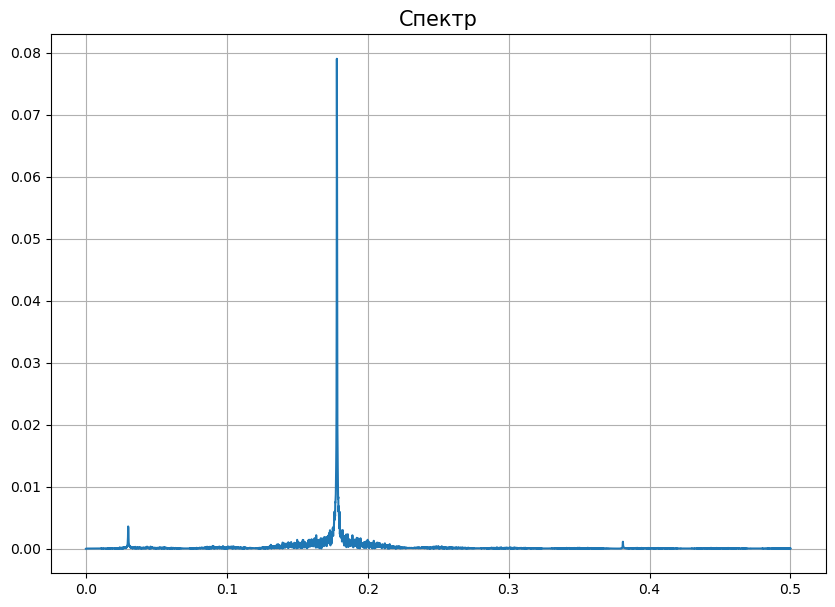

In [27]:
x, sig = sigenerator(8000, 0.1, 0.0005)
x_bk, sig_bk = bk_filter(sig, 10)
plotter_sig(x_bk, sig_bk, 'BK_sig.png', 'BK_FFT.png')

In [28]:
def master_bk():
    len_mas = [100, 500, 1000, 3000, 8000]
    noise_mas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    k_mas = [10, 15, 25, 35, 50, 65, 75, 90, 100]

    len_err = []
    n_err = []
    k_err = []
    
    for i in len_mas:
        error = []
        for j in range(100): 
            x, sig = sigenerator(i, 0.1, 0.0005)
            x_bk, sig_bk = bk_filter(sig, 60)
            spectr, nu = spectr_sig(x_bk, sig_bk)
    
            ind = np.argmax(spectr)
            frq_founded = nu[ind]
            error.append(np.abs(frq_founded - 0.17808989))
        len_err.append(np.mean(error))

    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(len_mas, np.abs(len_err), 'o', c='r', linestyle='solid')
    plt.title("Ошибка в зависимости от длины сигнала", fontsize=15)
    plt.xlabel("Length", fontsize=13)
    plt.ylabel("Error", fontsize=13)
    plt.grid(True)
    plt.savefig('BK_len.png')
    plt.show()     

    for i in noise_mas:
        error = []
        for j in range(100):
            x, sig = sigenerator(8000, i, 0.0005)
            x_bk, sig_bk = bk_filter(sig, 60)
            spectr, nu = spectr_sig(x_bk, sig_bk)
    
            ind = np.argmax(spectr)
            frq_founded = nu[ind]
            error.append(np.abs(frq_founded - 0.17808989))
        n_err.append(np.mean(error))

    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(noise_mas, np.abs(n_err), 'o', c='r', linestyle='solid')
    plt.title("Ошибка в зависимости от уровня шума", fontsize=15)
    plt.xlabel("Noise", fontsize=13)
    plt.ylabel("Error", fontsize=13)
    plt.grid(True)
    plt.savefig('BK_noise.png')
    plt.show()     

    for i in k_mas:
        error = []
        for j in range(100):
            x, sig = sigenerator(8000, 0.1, 0.0005)
            x_bk, sig_bk = bk_filter(sig, i)
            spectr, nu = spectr_sig(x_bk, sig_bk)
    
            ind = np.argmax(spectr)
            frq_founded = nu[ind]
            error.append(np.abs(frq_founded - 0.17808989))
        k_err.append(np.mean(error))

    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(k_mas, np.abs(k_err), 'o', c='r', linestyle='solid')
    plt.title("Ошибка в зависимости от параметра K", fontsize=15)
    plt.xlabel("K", fontsize=13)
    plt.ylabel("Error", fontsize=13)
    plt.grid(True)
    plt.savefig('BK_K.png')
    plt.show()     
        

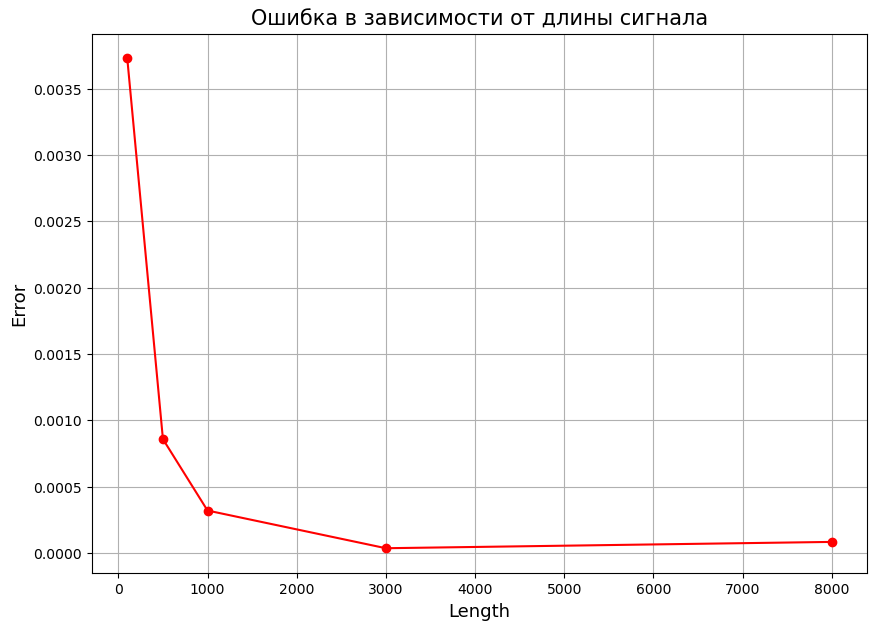

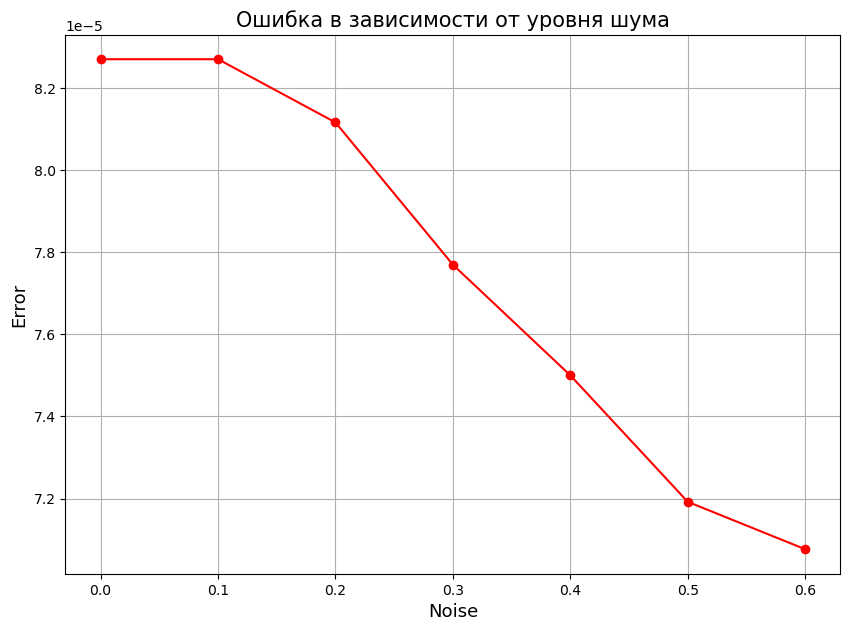

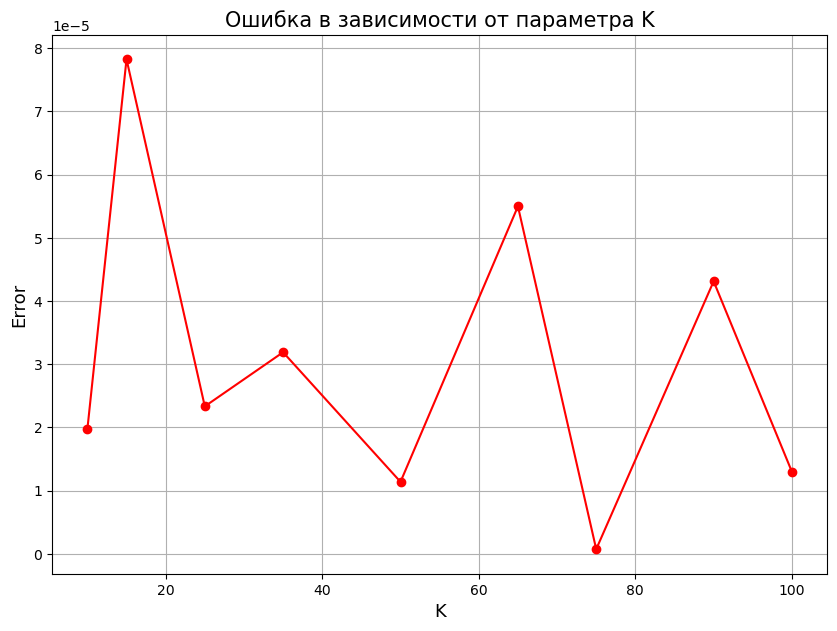

In [9]:
master_bk()

In [29]:
def cf_filter(sig, drift):
    cycle_cf, trend_cf = sm.tsa.filters.cffilter(sig, 5, 6.67, drift)
    return cycle_cf, trend_cf

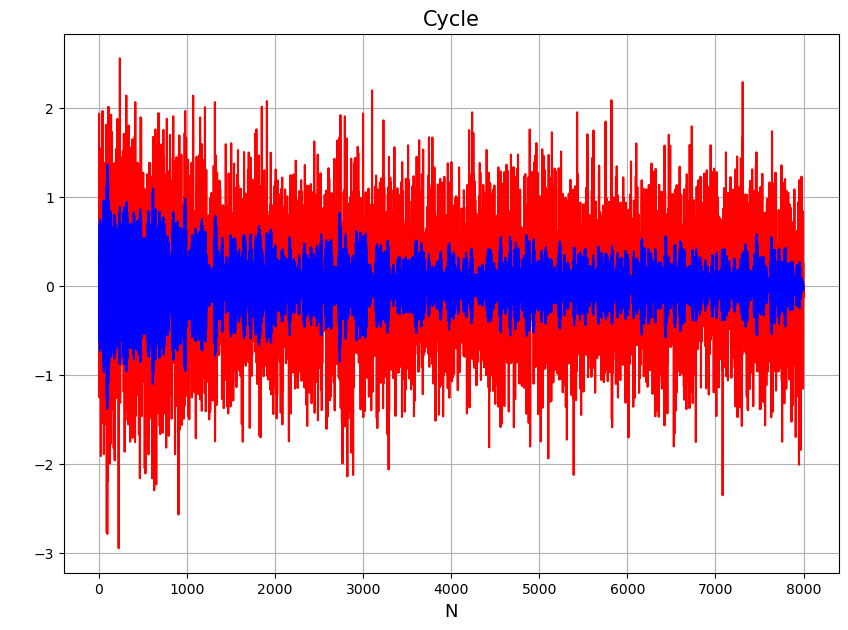

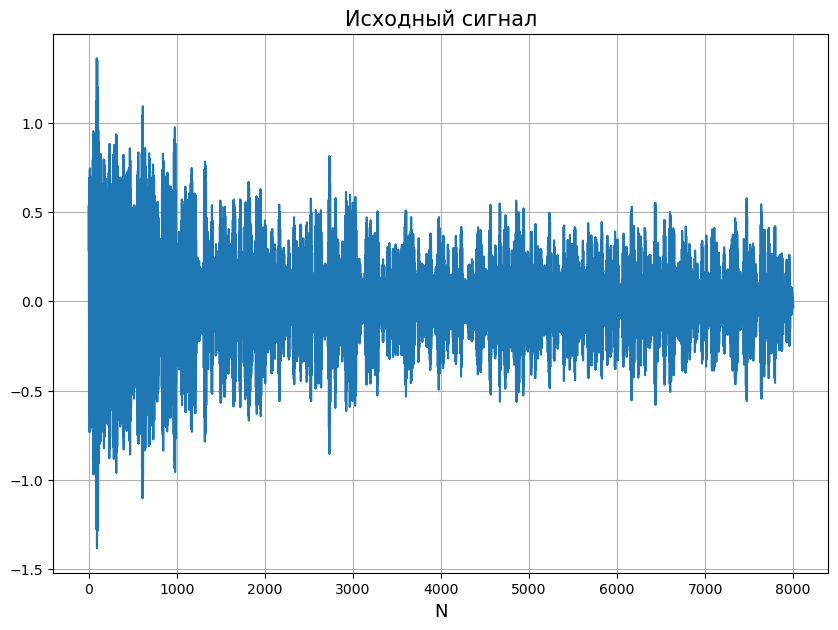

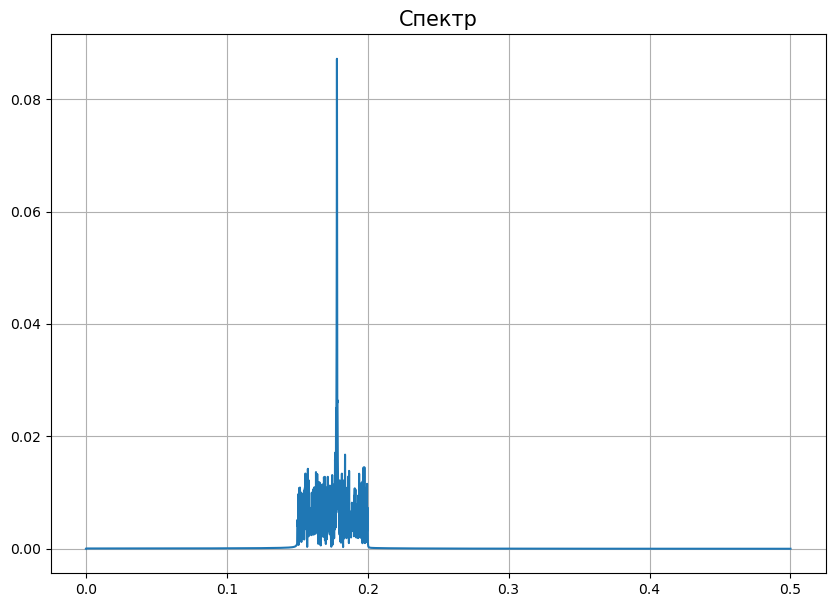

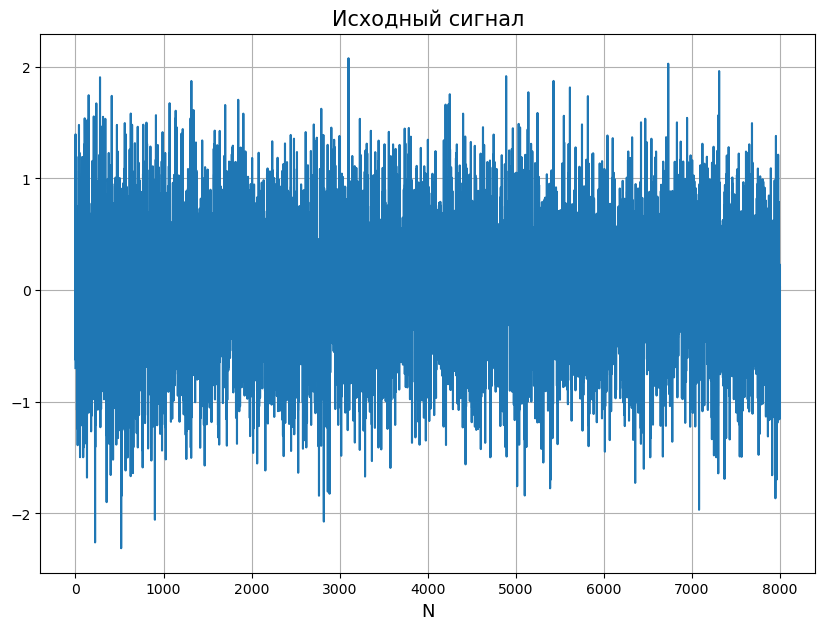

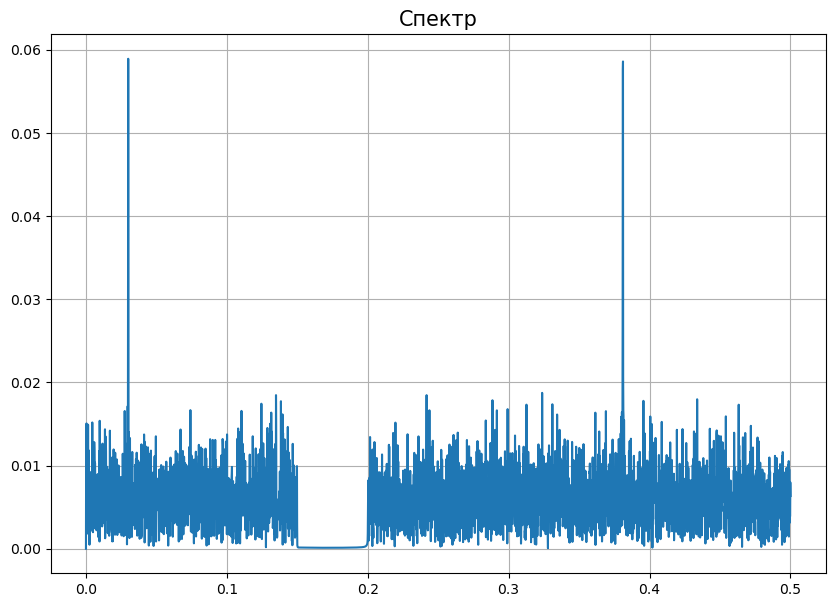

In [30]:
x, sig = sigenerator(8000, 0.6, 0.0005)
cycle_cf, trend_cf = cf_filter(sig, False)
figsize = [10, 7]
plt.figure(figsize=figsize)
plt.plot(x, sig, c='r', linestyle='solid', label='sig')
plt.plot(x, cycle_cf, c='b', linestyle='solid', label='cycle')
#plt.plot(x, trend_cf, c='g', linestyle='solid', label='trend')
plt.title("Cycle", fontsize=15)
plt.xlabel("N", fontsize=13)
plt.ylabel(" ", fontsize=13)
plt.grid(True)

plotter_sig(x, cycle_cf, 'CF_cycle.png', 'CF_cycle_FFT.png')
plotter_sig(x, trend_cf, 'CF_trend.png', 'CF_trend_FFT.png')

In [12]:
def master_cf():
    len_mas = [100, 500, 1000, 3000, 8000]
    noise_mas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

    len_err = []
    n_err = []
    
    for i in len_mas:
        error = []
        for j in range(100): 
            x, sig = sigenerator(i, 0.1, 0.0005)
            cycle_cf, trend_cf = cf_filter(sig, True)
            spectr, nu = spectr_sig(x, cycle_cf)
    
            ind = np.argmax(spectr)
            frq_founded = nu[ind]
            error.append(np.abs(frq_founded - 0.17808989))
        len_err.append(np.mean(error))

    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(len_mas, np.abs(len_err), 'o', c='r', linestyle='solid')
    plt.title("Ошибка в зависимости от длины сигнала", fontsize=15)
    plt.xlabel("Length", fontsize=13)
    plt.ylabel("Error", fontsize=13)
    plt.grid(True)
    plt.savefig('CF_len.png')
    plt.show()     

    for i in noise_mas:
        error = []
        for j in range(100):
            x, sig = sigenerator(8000, i, 0.0005)
            cycle_cf, trend_cf = cf_filter(sig, True)
            spectr, nu = spectr_sig(x, cycle_cf)
    
            ind = np.argmax(spectr)
            frq_founded = nu[ind]
            error.append(np.abs(frq_founded - 0.17808989))
        n_err.append(np.mean(error))

    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(noise_mas, np.abs(n_err), 'o', c='r', linestyle='solid')
    plt.title("Ошибка в зависимости от уровня шума", fontsize=15)
    plt.xlabel("Noise", fontsize=13)
    plt.ylabel("Error", fontsize=13)
    plt.grid(True)
    plt.savefig('CF_noise.png')
    plt.show()     

        

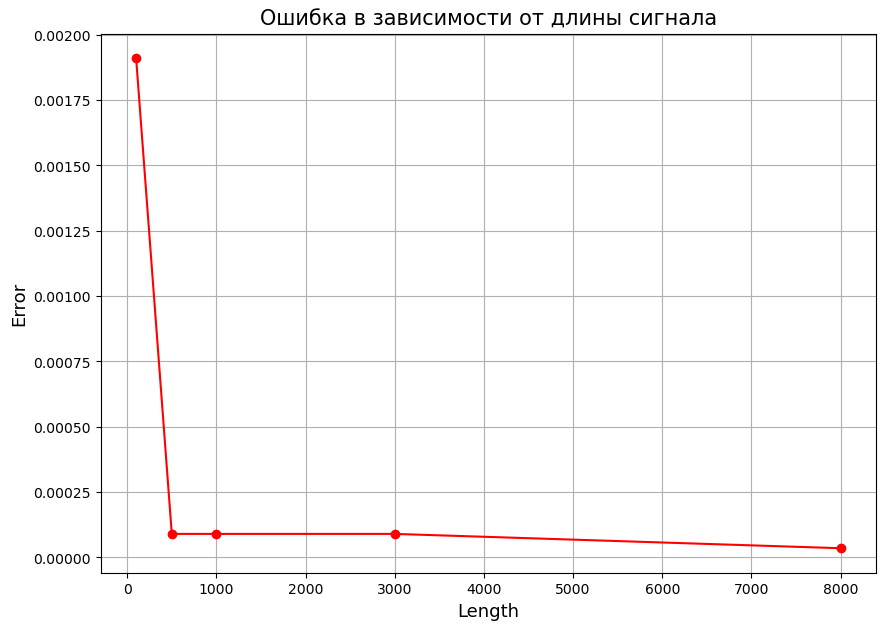

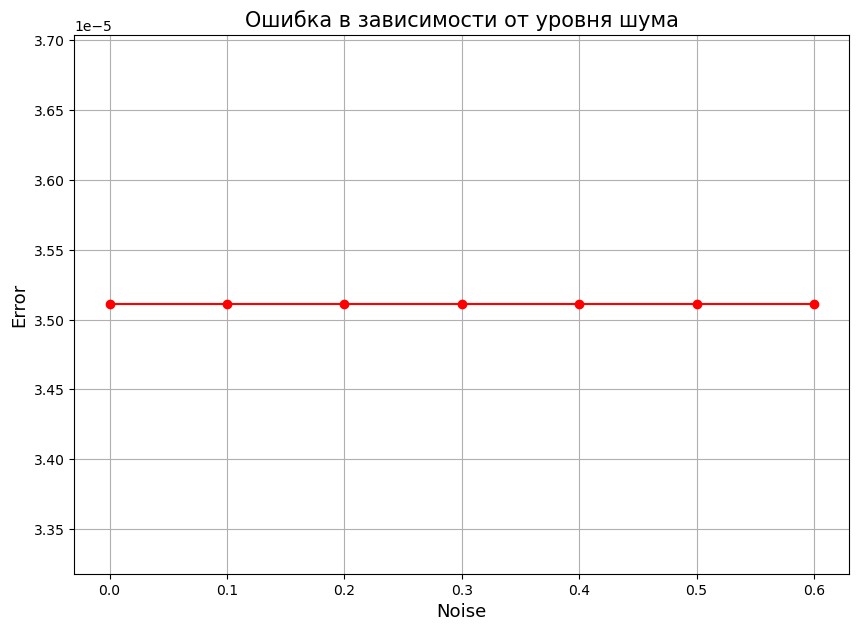

In [13]:
master_cf()

In [31]:
def PCA_filter(sig, thresh):
    pca = PCA(thresh).fit(sig)
    components = pca.transform(sig)
    filtered = pca.inverse_transform(components)
    return filtered

(8000, 8)


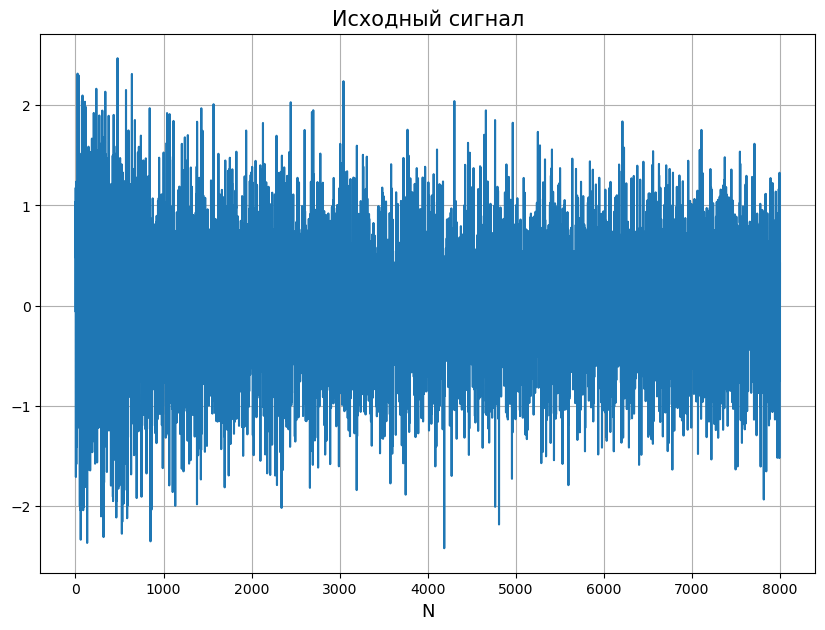

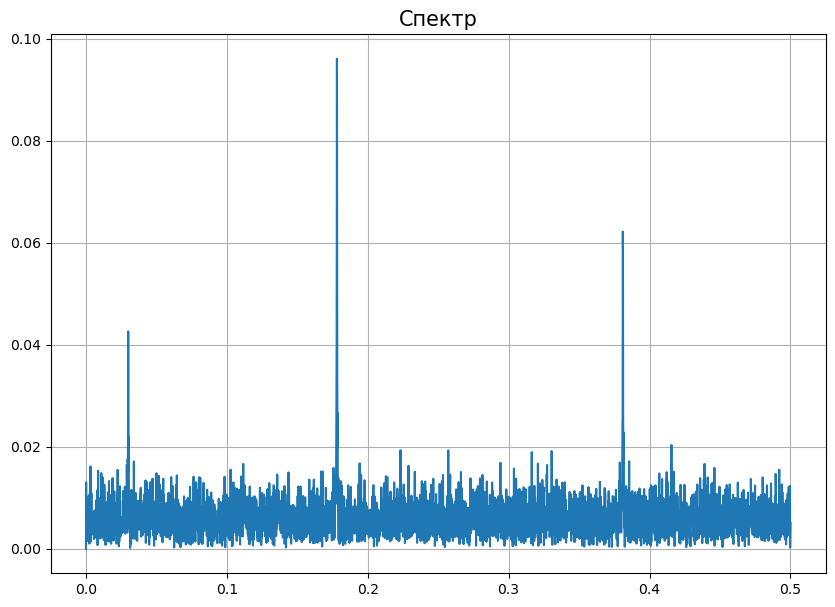

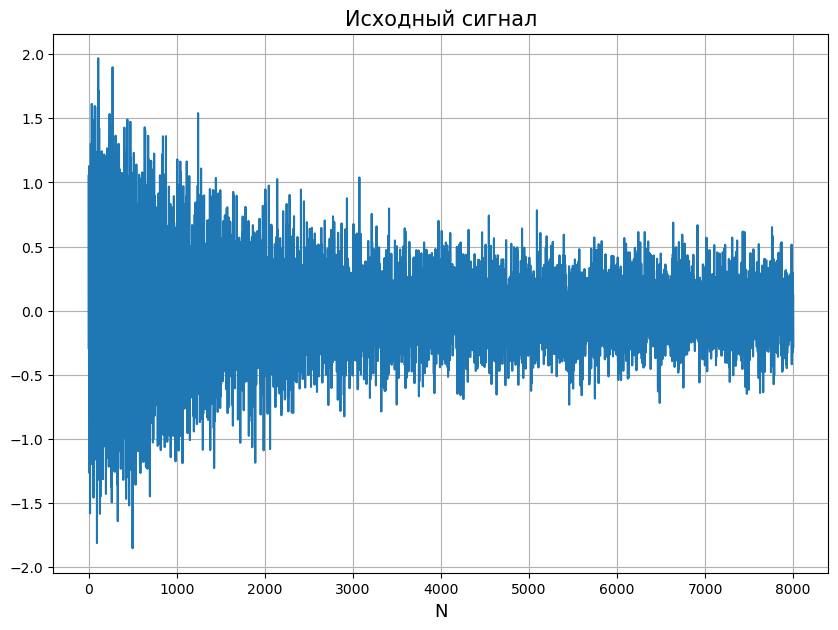

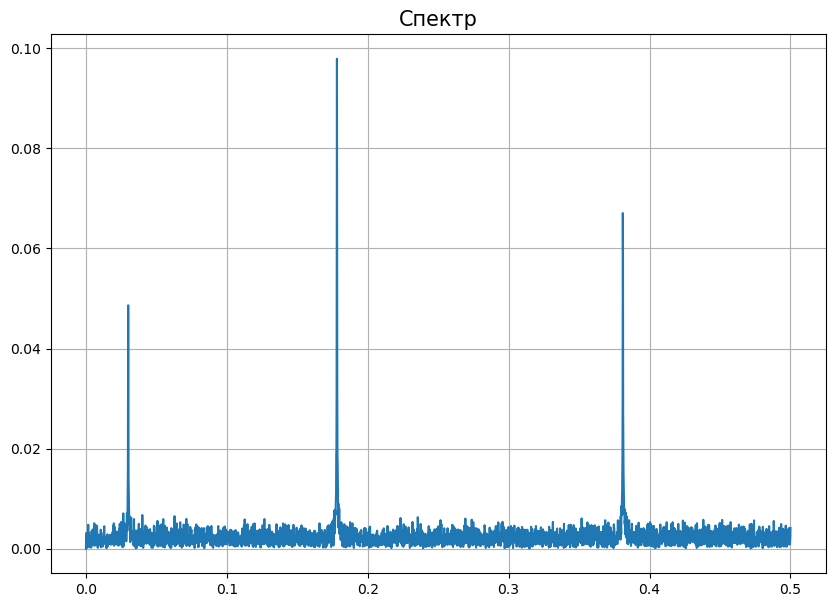

In [32]:
x, sig = sigenerator(8000, 0.6, 0.0005)
x, sig2 = sigenerator(8000, 0.6, 0.0005)
x, sig3 = sigenerator(8000, 0.6, 0.0005)
x, sig4 = sigenerator(8000, 0.6, 0.0005)
x, sig5 = sigenerator(8000, 0.6, 0.0005)
x, sig6 = sigenerator(8000, 0.6, 0.0005)
x, sig7 = sigenerator(8000, 0.6, 0.0005)
x, sig8 = sigenerator(8000, 0.6, 0.0005)
Mas = np.c_[sig, sig2, sig3, sig4,
            sig5, sig6, sig7, sig8]
filtered_sig = PCA_filter(Mas, 0.2)
new_sig = []
print(filtered_sig.shape)
for i in range(filtered_sig.shape[0]):
    new_sig.append(filtered_sig[i][0])

plotter_sig(x, sig, 'err.png', 'err2.png')
plotter_sig(x, new_sig, 'PCA.png', 'PCA_FFT.png')

In [16]:
def master_pca():
    len_mas = [100, 500, 1000, 3000, 8000]
    noise_mas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    thresh = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    len_err = []
    n_err = []
    t_err = []
    
    for i in len_mas:
        error = []
        for j in range(100): 
            x, sig = sigenerator(i, 0.1, 0.0005)
            x, sig2 = sigenerator(i, 0.1, 0.0005)
            x, sig3 = sigenerator(i, 0.1, 0.0005)
            x, sig4 = sigenerator(i, 0.1, 0.0005)
            Mas = np.c_[sig, sig2, sig3, sig4]
            filtered_sig = PCA_filter(Mas, 0.2)
            new_sig = []

            for l in range(filtered_sig.shape[0]):
                new_sig.append(filtered_sig[l][0])
            spectr, nu = spectr_sig(x, new_sig)
    
            ind = np.argmax(spectr)
            frq_founded = nu[ind]
            error.append(np.abs(frq_founded - 0.17808989))
        len_err.append(np.mean(error))

    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(len_mas, np.abs(len_err), 'o', c='r', linestyle='solid')
    plt.title("Ошибка в зависимости от длины сигнала", fontsize=15)
    plt.xlabel("Length", fontsize=13)
    plt.ylabel("Error", fontsize=13)
    plt.grid(True)
    plt.savefig('PCA_len.png')
    plt.show()     

    for i in noise_mas:
        error = []
        for j in range(100):
            x, sig = sigenerator(8000, i, 0.0005)
            x, sig2 = sigenerator(8000, i, 0.0005)
            x, sig3 = sigenerator(8000, i, 0.0005)
            x, sig4 = sigenerator(8000, i, 0.0005)
            Mas = np.c_[sig, sig2, sig3, sig4]
            filtered_sig = PCA_filter(Mas, 0.2)
            new_sig = []

            for l in range(filtered_sig.shape[0]):
                new_sig.append(filtered_sig[l][0])
            spectr, nu = spectr_sig(x, new_sig)
    
            ind = np.argmax(spectr)
            frq_founded = nu[ind]
            error.append(np.abs(frq_founded - 0.17808989))
        n_err.append(np.mean(error))

    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(noise_mas, np.abs(n_err), 'o', c='r', linestyle='solid')
    plt.title("Ошибка в зависимости от уровня шума", fontsize=15)
    plt.xlabel("Noise", fontsize=13)
    plt.ylabel("Error", fontsize=13)
    plt.grid(True)
    plt.savefig('PCA_noise.png')
    plt.show()     

    for i in thresh:
        error = []
        for j in range(100):
            x, sig = sigenerator(8000, 0.6, 0.0005)
            x, sig2 = sigenerator(8000, 0.6, 0.0005)
            x, sig3 = sigenerator(8000, 0.6, 0.0005)
            x, sig4 = sigenerator(8000, 0.6, 0.0005)
            Mas = np.c_[sig, sig2, sig3, sig4]
            filtered_sig = PCA_filter(Mas, i)
            new_sig = []

            for l in range(filtered_sig.shape[0]):
                new_sig.append(filtered_sig[l][0])
            spectr, nu = spectr_sig(x, new_sig)
    
            ind = np.argmax(spectr)
            frq_founded = nu[ind]
            error.append(np.abs(frq_founded - 0.17808989))
        t_err.append(np.mean(error))

    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(thresh, np.abs(t_err), 'o', c='r', linestyle='solid')
    plt.title("Ошибка в зависимости от границы фильтрации", fontsize=15)
    plt.xlabel("Threshold", fontsize=13)
    plt.ylabel("Error", fontsize=13)
    plt.grid(True)
    plt.savefig('PCA_thresh.png')
    plt.show()     

        

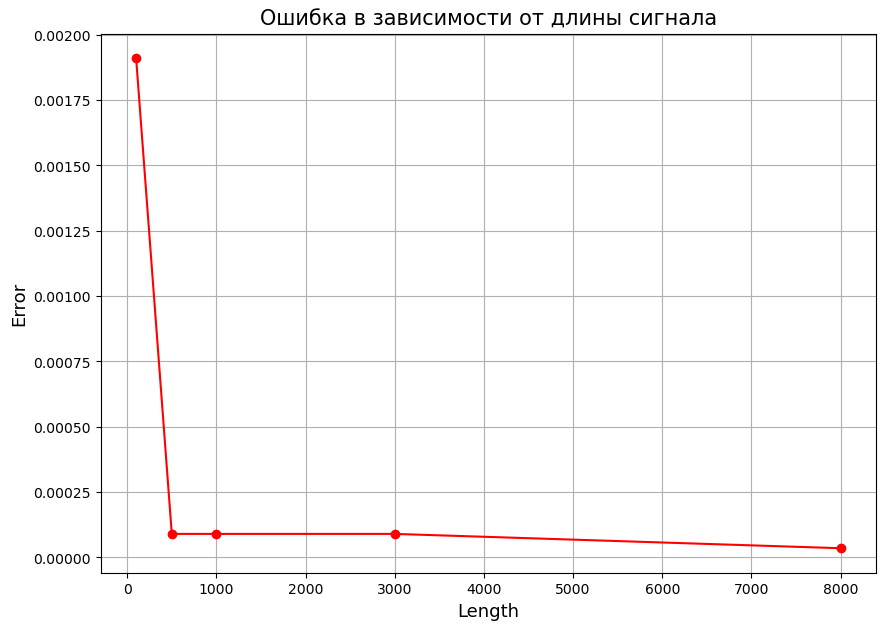

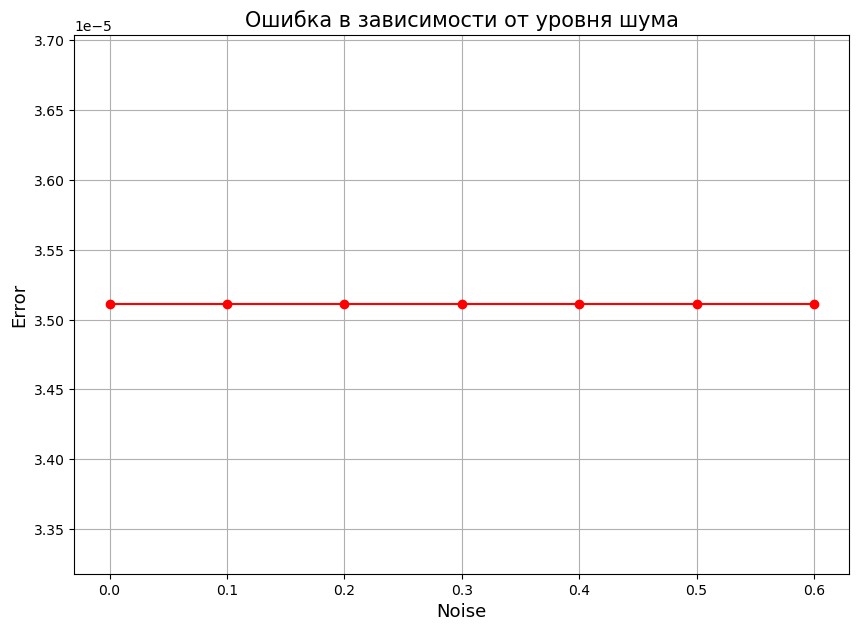

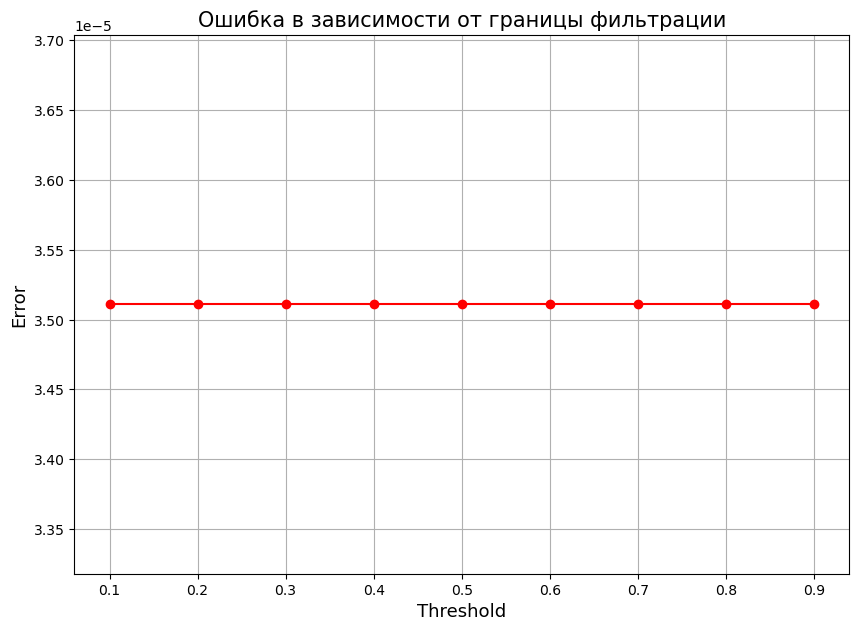

In [17]:
master_pca()

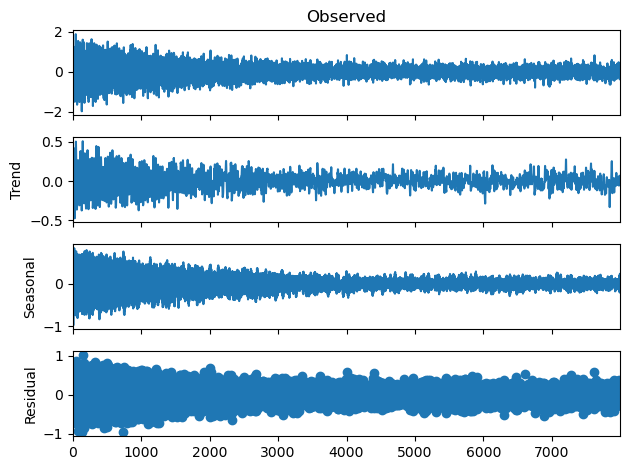

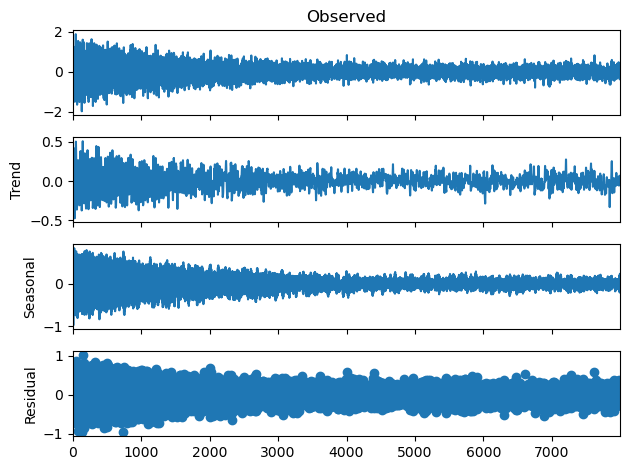

In [18]:
from statsmodels.tsa.seasonal import STL
x, sig = sigenerator(8000, 0.2, 0.0005)
res = STL(sig, period=6).fit()
res.plot()